In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
cars = pd.read_csv('audiA4Cleaned.csv')



In [116]:
cars.describe()

,Godiste,Kilometraza,Kubikaza,Snaga,Oprema,Cena
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2006.670000,220018.716000,1.972900,139.537000,33.834000,5943.624000
std,3.520155,39606.252006,0.106051,18.067459,10.619851,2940.740222
min,2000.000000,104259.000000,1.600000,90.000000,5.000000,1300.000000
25%,2004.000000,190930.000000,1.900000,131.000000,26.000000,3799.750000
50%,2006.000000,214000.000000,2.000000,140.000000,33.000000,4899.000000
75%,2009.000000,246000.000000,2.000000,143.000000,41.000000,7812.500000
max,2016.000000,330000.000000,3.000000,239.000000,69.000000,14500.000000


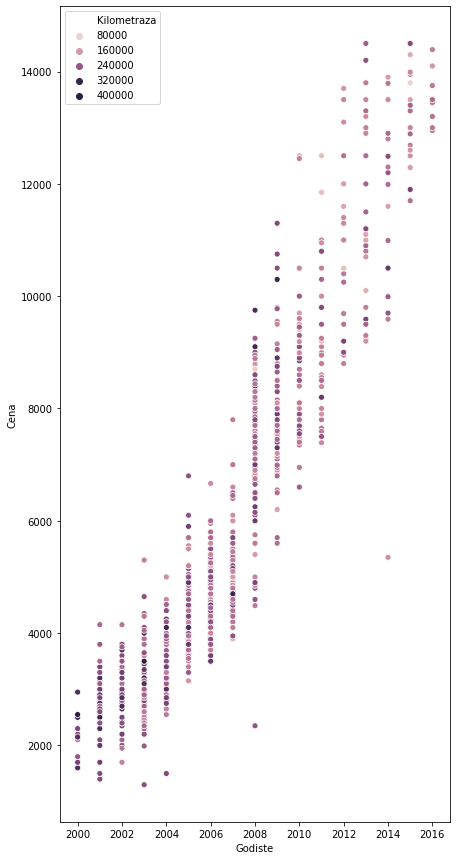

In [117]:
import numpy as np
plt.figure(figsize=(7,15))
sns.scatterplot(x='Godiste',y='Cena', data=cars, hue='Kilometraza')


In [118]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Godiste                1000 non-null   int64  
 1   Kilometraza            1000 non-null   int64  
 2   Karoserija             1000 non-null   object 
 3   Gorivo                 1000 non-null   object 
 4   Kubikaza               1000 non-null   float64
 5   Snaga                  1000 non-null   int64  
 6   Emisiona klasa motora  1000 non-null   object 
 7   Pogon                  1000 non-null   object 
 8   Menjač                 1000 non-null   object 
 9   Klima                  1000 non-null   object 
 10  Boja                   1000 non-null   object 
 11  Materijal enterijera   1000 non-null   object 
 12  Boja enterijera        1000 non-null   object 
 13  Oprema                 1000 non-null   int64  
 14  Cena                   1000 non-null   float64
dtypes: fl

In [119]:
cars.columns[:14]

Index(['Godiste', 'Kilometraza', 'Karoserija', 'Gorivo', 'Kubikaza', 'Snaga',
       'Emisiona klasa motora', 'Pogon', 'Menjač', 'Klima', 'Boja',
       'Materijal enterijera', 'Boja enterijera', 'Oprema'],
      dtype='object')

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Encoding text variables into numerical
cars['Gorivo'] = labelencoder.fit_transform(cars['Gorivo'])
cars['Karoserija']  = labelencoder.fit_transform(cars['Karoserija'])
cars['Emisiona klasa motora'] = labelencoder.fit_transform(cars['Emisiona klasa motora'])
cars['Pogon'] =  labelencoder.fit_transform(cars['Pogon'])
cars['Menjač'] =  labelencoder.fit_transform(cars['Menjač'])
cars['Klima'] = labelencoder.fit_transform(cars['Klima'])
cars['Boja'] = labelencoder.fit_transform(cars['Boja'])
cars['Boja enterijera'] = labelencoder.fit_transform(cars['Boja enterijera'])
cars['Materijal enterijera'] = labelencoder.fit_transform(cars['Materijal enterijera'])


[16:45:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Mae is: 514.6564689127604
RMSE is: 709.3259019138833
R2 score is: 0.9444995181284861


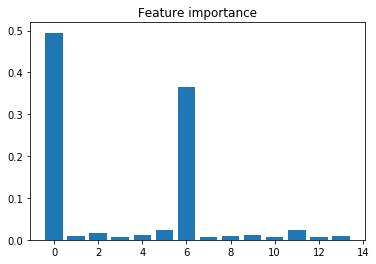

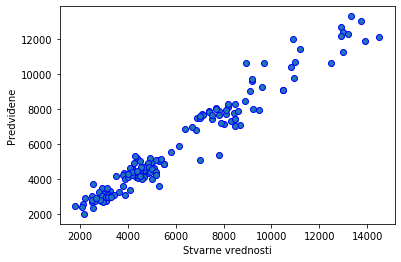

In [131]:
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler,  StandardScaler
from sklearn import metrics
import pickle




X = cars[['Godiste', 'Kilometraza', 'Karoserija', 'Gorivo', 'Kubikaza', 'Snaga',
       'Emisiona klasa motora', 'Pogon', 'Menjač', 'Klima',
       'Boja', 'Oprema', 'Boja enterijera', 'Materijal enterijera']]
y = cars[['Cena']]
        
scalerMin = MinMaxScaler()
scalerRobust = RobustScaler()
scalerStandard= StandardScaler()
        
# Split the data into train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
boost = XGBRegressor(colsample_bytree=0.9, learning_rate=0.005, max_depth= 5, min_child_weight= 4, n_estimators= 1000, nthread=4, objective='reg:squarederror', silent= 1, subsample= 0.7)

X_train = X_train.values
X_test = X_test.values

"""### Tuning hyper-parameters

boost=XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.3, .2, .1, .05, .01, 0.03, .005], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7,0.8,0.9,0.1],
              'colsample_bytree': [0.7,0.8,0.9,0.1],
              'n_estimators': [999]}



xgb_grid = GridSearchCV(boost,parameters,cv = 2,n_jobs = 5,verbose=True)
xgb_grid.fit(X_train, y_train) # .values.ravel()
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
"""



"""
X_train = scalerRobust.fit_transform(X_train)
X_test = scalerRobust.fit_transform(X_test)"""

"""X_train = scalerStandard.fit_transform(X_train)
X_test = scalerStandard.fit_transform(X_test)"""
    
boost.fit(X_train, y_train) # .values.ravel()
        

# Predictions
predictions = boost.predict(X_test)
mae = metrics.mean_absolute_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
r2 = metrics.r2_score(y_test,predictions)
print("Mae is: {}".format(mae))
print("RMSE is: {}".format(rmse))
print("R2 score is: {}".format(r2))
# plot

plt.bar(range(len(boost.feature_importances_)), boost.feature_importances_)
plt.title("Feature importance")
# Save ML model

file_name = "audiA4"+'.pkl'
with open(file_name, 'wb') as file:  
    pickle.dump(boost, file)

fig, ax = plt.subplots()
ax.scatter(y_test, predictions, edgecolors=(0, 0, 1))
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Stvarne vrednosti')
ax.set_ylabel('Predviđene')
plt.show()
        
        
        
            


In [126]:
with open('audiA4.pkl', 'rb') as file:  
    audiA4 = pickle.load(file)

In [123]:
'Godiste', 'Kilometraza', 'Karoserija', 'Gorivo', 'Kubikaza', 'Snaga','Emisiona klasa motora', 'Pogon', 'Menjač', 'Klima',
       'Boja', 'Oprema', 'Boja enterijera', 'Materijal enterijera'

IndentationError: unexpected indent (<ipython-input-123-69eb032d260a>, line 2)

In [139]:
fv= [2010,50000,2,1,2.0,143,1,0,2,1,4,30,2,4]
fv = np.array(fv).reshape((1,-1))
#fv = xgboost.DMatrix(fv)
audiA4.predict(fv)

array([9339.432], dtype=float32)